#### This notebook is used for reading in the data using the correct encoding, removing headers and footers, renaming columns, choosing the correct column types and saving the cleaned data.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### construction cost data

In [173]:
construction_cost = pd.read_csv('../data/baukosten.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)
construction_cost.columns = ['year', 'total cost', 'material cost', 'labor cost']
construction_cost

,year,total cost,material cost,labor cost
0,2005,81.8,80.8,83.4
1,2006,83.8,84.3,82.8
2,2007,86.6,88.2,84.0
3,2008,89.5,90.9,87.2
4,2009,89.8,89.4,90.4
5,2010,91.8,92.1,91.5
6,2011,95.2,96.1,93.5
7,2012,97.1,97.7,96.2
8,2013,97.8,98.8,96.0
9,2014,98.7,99.7,97.1


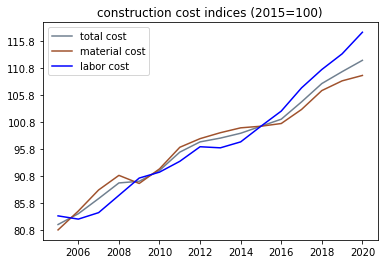

In [243]:
plt.plot(construction_cost['year'], construction_cost['total cost'], color='slategrey', label='total cost')
plt.plot(construction_cost['year'], construction_cost['material cost'], color='sienna', label='material cost')
plt.plot(construction_cost['year'], construction_cost['labor cost'], color='blue', label='labor cost')
plt.yticks(np.arange(construction_cost.iloc[:, 1:].min().min(), construction_cost.iloc[:, 1:].max().max(), 5))
plt.legend()
plt.title('construction cost indices (2015=100)');

In [175]:
construction_cost.to_csv('../data/construction_cost.csv')

#### living space data

In [237]:
housing = pd.read_csv('../data/wohnungsbestand.csv', encoding = 'latin1', sep=';', decimal=',', header=7, skipfooter=4)
# we are only interested in the total living space in qm
housing = housing.iloc[:, [0, 1, -1]]
housing.columns = ['year', 'federal state', 'living space']
# only show year
housing.year = pd.to_datetime(housing.year, format='%d.%m.%Y').dt.year
housing

,year,federal state,living space
0,2004,Baden-Württemberg,430935
1,2004,Bayern,522306
2,2004,Berlin,130010
3,2004,Brandenburg,95717
4,2004,Bremen,26459
...,...,...,...
284,2020,Sachsen,175214
285,2020,Sachsen-Anhalt,101807
286,2020,Schleswig-Holstein,137589
287,2020,Thüringen,94875


compute living space indices (2015=100%)

In [240]:
fed_states = housing['federal state'].unique()

for fed_state in fed_states:
    state_mask = housing['federal state'] == fed_state
    year_mask = housing['year'] == 2015
    index_100 = housing[state_mask & year_mask]['living space'].item() / 100
    housing.loc[state_mask, 'living space'] = housing.loc[state_mask, 'living space'].divide(index_100, axis=0)


In [241]:
housing

,year,federal state,living space
0,2004,Baden-Württemberg,89.872679
1,2004,Bayern,88.890591
2,2004,Berlin,95.069908
3,2004,Brandenburg,88.855573
4,2004,Bremen,95.533651
...,...,...,...
284,2020,Sachsen,102.990725
285,2020,Sachsen-Anhalt,101.637266
286,2020,Schleswig-Holstein,104.770644
287,2020,Thüringen,102.464549


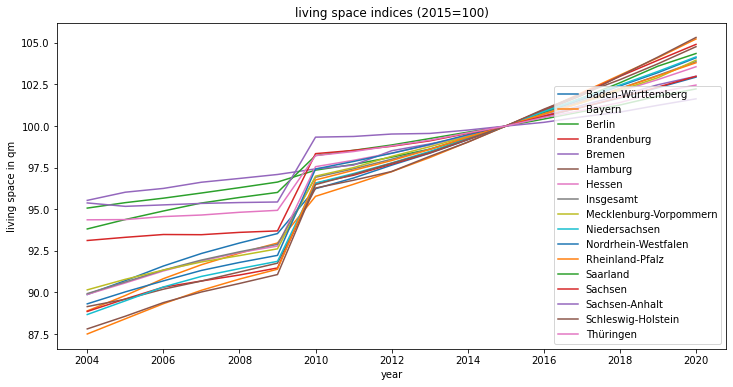

In [246]:
plt.figure(figsize=(12, 6))

for key, datum in housing.groupby('federal state'):

    plt.plot(datum['year'], datum['living space'], label=key)
    
plt.legend()
plt.xlabel('year')
plt.ylabel('living space in qm')
plt.title('living space indices (2015=100)');